In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

# Importación de datos

In [2]:
df_data = pd.read_csv('../../data/final/data_rows.csv', index_col=0)

# Preparación de datos

In [3]:
# Agrupamos los datos por cada uno de los países
df_data = df_data.groupby('Country Name').mean().reset_index().drop('year', axis = 1)

# Calculamos las muertes por cada 100.000 habitantes
df_data['deaths_rate'] = df_data['deaths']/df_data['populantion']*100000

# Calculamos el PIB per cápita
df_data['pib_per_cap'] = df_data['pib']/df_data['populantion']

# Tokenizamos la lista de países
country_list = df_data['Country Name'].values.tolist()
df_data['Country Name'] = df_data.index
df_data.columns=['country', 'public_health','deaths', 'population', 'pib', 'deaths_rate', 'pib_per_cap']

In [4]:
df_data.head()

,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap
0,0,0.0,6.150798e+05,3.932711e+07,3.537290e+11,1564.009628,8994.534192
1,1,0.0,2.822529e+06,1.868875e+08,1.371976e+12,1510.282288,7341.184771
2,2,1.0,2.971391e+03,3.660920e+05,1.029916e+10,811.651430,28132.716608
3,3,1.0,5.220874e+05,3.271917e+07,1.210058e+12,1595.662239,36983.153132
4,4,0.0,3.962717e+05,4.289250e+07,2.008953e+11,923.871562,4683.693004


In [5]:
df_data.shape

(20, 7)

# Implementación de K-Means
## 1. deaths_rate vs pib_per_cap

### Extracción y normalización de datos

In [6]:
# Extraemos las columnas que queremos utilizar para realizar el clustering
data_to_cluster = df_data.loc[:, ['deaths_rate', 'pib_per_cap']].values

In [7]:
# Normalización los datos
scaler = StandardScaler()
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del codo para obtener la mejor k

In [8]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_data)
    
    inertia.append(kmeans.inertia_)

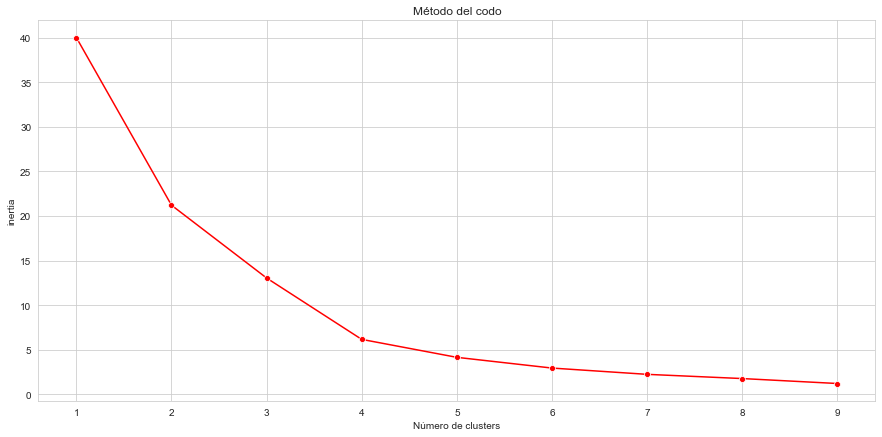

In [9]:
plt.figure(figsize=(15,7))
sns.lineplot(x=range(1, len(inertia)+1), y=inertia, marker='o', color='red')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('inertia')
plt.show()

In [10]:
# Creación del modelo con la mejor k obtenida
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

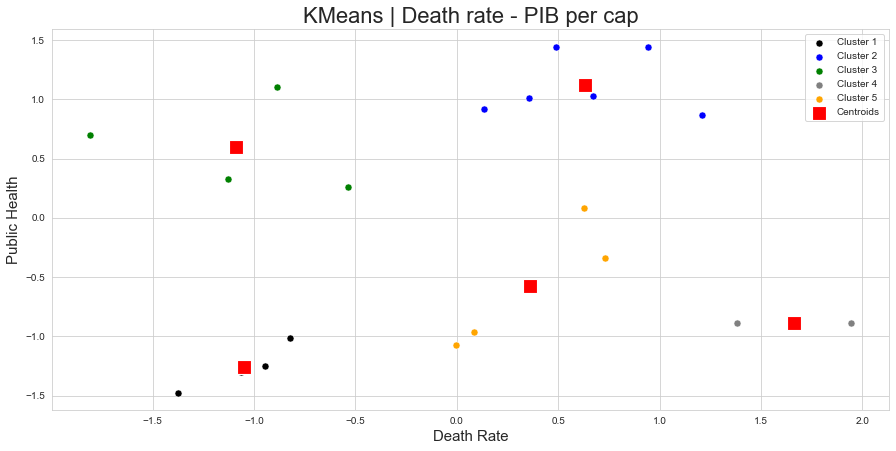

In [11]:
# Visualización de los clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=cluster_data[y_kmeans == 0, 0], y=cluster_data[y_kmeans == 0, 1], color = 'black', label = 'Cluster 1',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 1, 0], y=cluster_data[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 2, 0], y=cluster_data[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 3, 0], y=cluster_data[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 4, 0], y=cluster_data[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=200,marker=',')

plt.title("KMeans | Death rate - PIB per cap", size=22)
plt.xlabel('Death Rate',fontsize = 15)
plt.ylabel('Public Health',fontsize = 15)
plt.legend()
plt.show()

In [12]:
# Añadimos el nombre del país a cada registro y el cluster en el que se ha incluido
df_data['cluster'] = y_kmeans
df_data['country_name'] = country_list

In [13]:
# Mostramos cada uno de los clusters con los países asociados
for cluster in range(5):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster+1))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Colombia
 - Ecuador
 - Mexico
 - Nicaragua
Cluster 2
 - Canada
 - Finland
 - Germany
 - Japan
 - Sweden
 - United States of America
Cluster 3
 - Brunei Darussalam
 - Israel
 - Kuwait
 - Singapore
Cluster 4
 - Croatia
 - Hungary
Cluster 5
 - Argentina
 - Brazil
 - Slovenia
 - Spain


## 2. deaths_rate vs public_health
### Extracción y normalización de datos

In [14]:
# Extraemos las columnas que queremos utilizar para realizar el clustering
data_to_cluster = df_data.loc[:, ['deaths_rate', 'public_health']].values

# Normalización los datos
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del codo para obtener la mejor k

In [15]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_data)
    
    inertia.append(kmeans.inertia_)

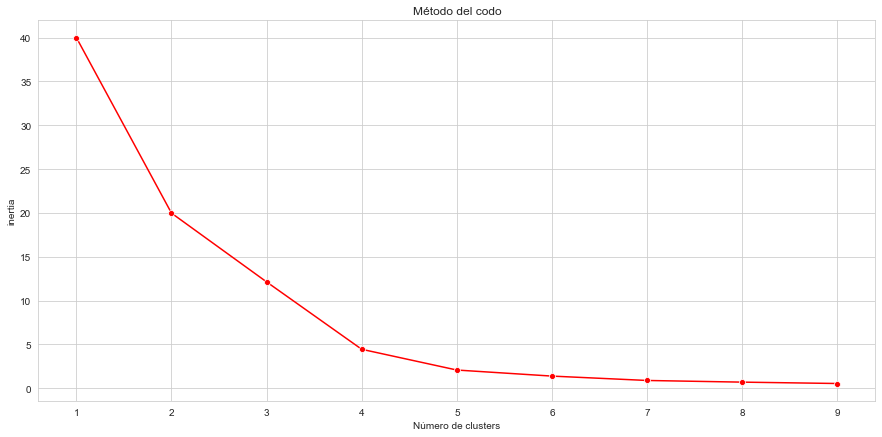

In [16]:
plt.figure(figsize=(15,7))
sns.lineplot(x=range(1, len(inertia)+1), y=inertia, marker='o', color='red')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('inertia')
plt.show()

In [17]:
# Creación del modelo con la mejor k obtenida
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

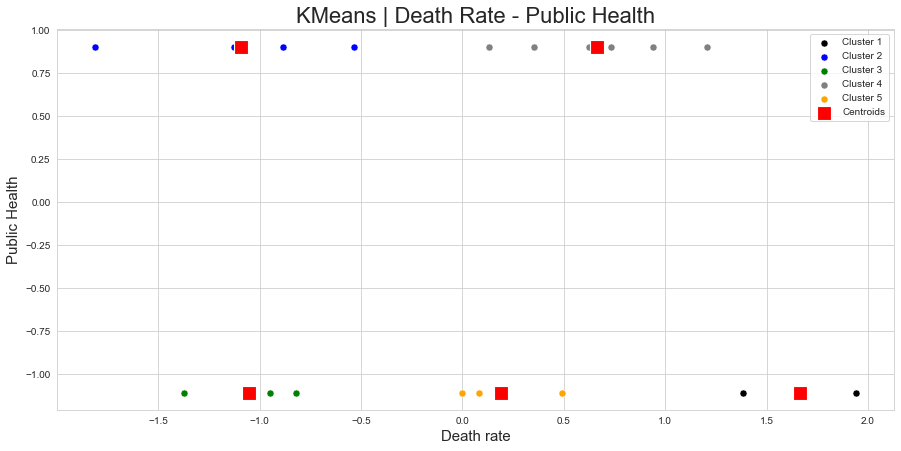

In [18]:
# Visualización de los clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=cluster_data[y_kmeans == 0, 0], y=cluster_data[y_kmeans == 0, 1], color = 'black', label = 'Cluster 1',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 1, 0], y=cluster_data[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 2, 0], y=cluster_data[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 3, 0], y=cluster_data[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=cluster_data[y_kmeans == 4, 0], y=cluster_data[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=200,marker=',')

plt.title("KMeans | Death Rate - Public Health", size=22)
plt.xlabel('Death rate',fontsize = 15)
plt.ylabel('Public Health',fontsize = 15)
plt.legend()
plt.show()

In [19]:
# Añadimos el nombre del país a cada registro y el cluster en el que se ha incluido
df_data['cluster'] = y_kmeans
df_data['country_name'] = country_list

In [20]:
# Mostramos cada uno de los clusters con los países asociados
for cluster in range(5):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster+1))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Croatia
 - Hungary
Cluster 2
 - Brunei Darussalam
 - Israel
 - Kuwait
 - Singapore
Cluster 3
 - Colombia
 - Ecuador
 - Mexico
 - Nicaragua
Cluster 4
 - Canada
 - Finland
 - Germany
 - Japan
 - Slovenia
 - Spain
 - Sweden
Cluster 5
 - Argentina
 - Brazil
 - United States of America


## 3. deaths_rate vs pib_per_cap vs public_health
### Extracción y normalización de datos

In [21]:
# Extraemos las columnas que queremos utilizar para realizar el clustering
data_to_cluster = df_data.loc[:, ['deaths_rate', 'pib_per_cap', 'public_health']].values

# Normalización los datos
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del codo para obtener la mejor k

In [22]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_data)
    
    inertia.append(kmeans.inertia_)

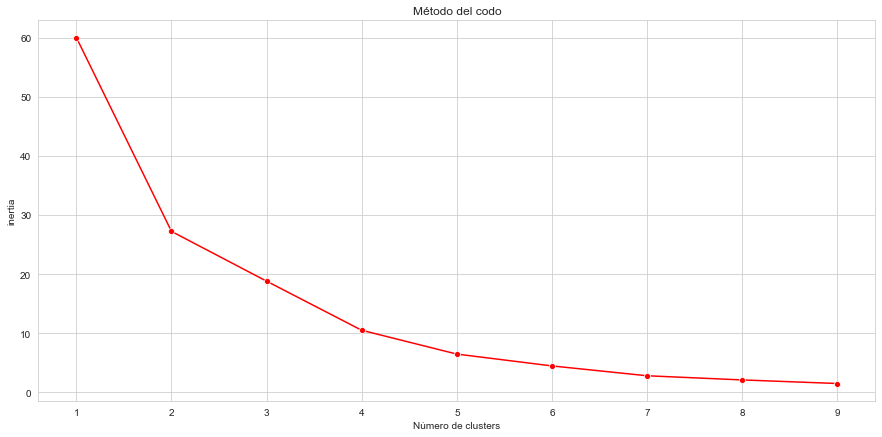

In [23]:
plt.figure(figsize=(15,7))
sns.lineplot(x=range(1, len(inertia)+1), y=inertia, marker='o', color='red')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('inertia')
plt.show()

In [24]:
# Creación del modelo con la mejor k obtenida
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [25]:
# Añadimos el nombre del país a cada registro y el cluster en el que se ha incluido
df_data['cluster'] = y_kmeans
df_data['country_name'] = country_list

In [26]:
# Mostramos cada uno de los clusters con los países asociados
for cluster in range(5):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster+1))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Croatia
 - Hungary
Cluster 2
 - Canada
 - Finland
 - Germany
 - Japan
 - Slovenia
 - Spain
 - Sweden
Cluster 3
 - Argentina
 - Brazil
 - Colombia
 - Ecuador
 - Mexico
 - Nicaragua
Cluster 4
 - Brunei Darussalam
 - Israel
 - Kuwait
 - Singapore
Cluster 5
 - United States of America


In [27]:
# Exportación del dataset
#df_data.to_csv('../../data/final/clusterize_data.csv')